In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.fashion_mnist

In [3]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [4]:
tf.version()

TypeError: 'TFModuleWrapper' object is not callable

In [5]:
tf._version_()

AttributeError: module 'tensorflow' has no attribute '_version_'

In [6]:
tf.__version__

'2.0.0-rc0'

### Training and Test Sets

In [7]:
(x_train,y_train), (x_test,y_test)= mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


### Exploratory Analysis

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
np.max(x_train)

255

In [16]:
np.min(x_train)

0

In [17]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

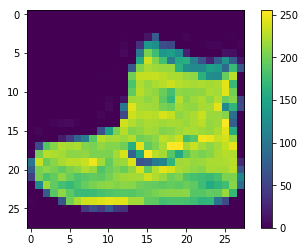

In [18]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [19]:
x_train = x_train/255.0

### Building model

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [24]:
model= Sequential()

In [26]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Model Compilation
#### 1) Loss function
#### 2) Optimizer
#### 3) Metrics

In [28]:
model.compile(optimizer ='adam' , loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [29]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5069 - accuracy: 0.8213
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3705 - accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3323 - accuracy: 0.8781
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3101 - accuracy: 0.8838
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2911 - accuracy: 0.8902
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2754 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2605 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2521 - accuracy: 0.9051
Epoch 9/10
60000/60000 [===

In [30]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8278
